<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://media-exp2.licdn.com/dms/image/C4D22AQFi0OVtzMJ3OA/feedshare-shrink_800/0/1657887716623?e=1660780800&v=beta&t=d-O1tmLGC0phHv3oREvvz6I9akSJMJXhzU8ZyCZJZo0" width="200" alt="MT Learners"  />
    </a>
</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis='columns'),df.Purchased,test_size=0.3,random_state=0)

In [7]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_trained_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

# To convert numpy array to DataFrame

In [10]:
x_trained_scaler=pd.DataFrame(x_trained_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [11]:
np.round(x_trained_scaler.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effects when we scale the columns

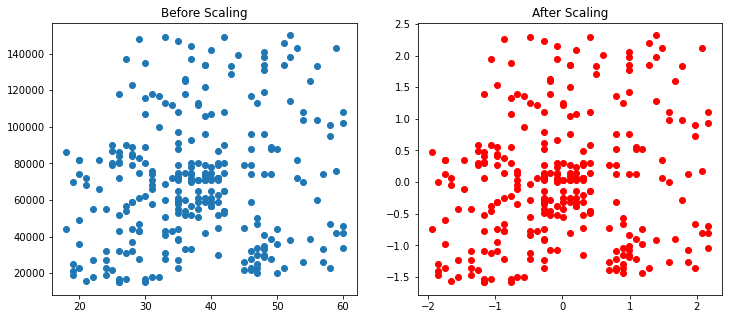

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_trained_scaler['Age'], x_trained_scaler['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

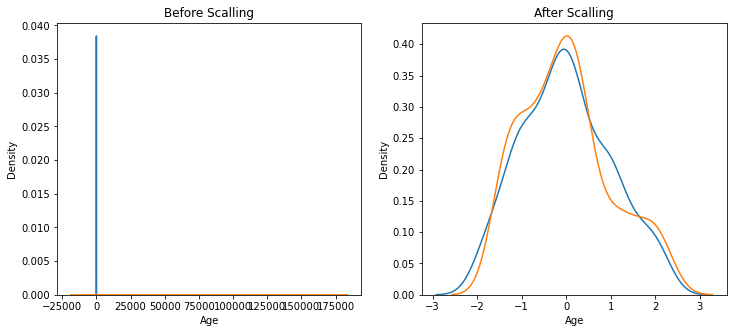

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After scalling
ax2.set_title('After Scalling')
sns.kdeplot(x_trained_scaler['Age'],ax=ax2)
sns.kdeplot(x_trained_scaler['EstimatedSalary'],ax=ax2)
plt.show()

# Individual Effects

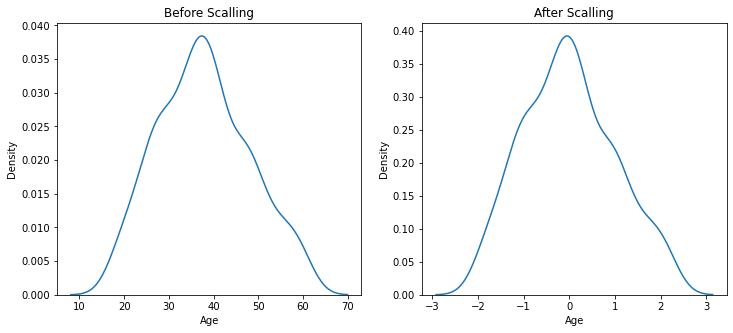

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Age'],ax=ax1)


#After scalling
ax2.set_title('After Scalling')
sns.kdeplot(x_trained_scaler['Age'],ax=ax2)

plt.show()

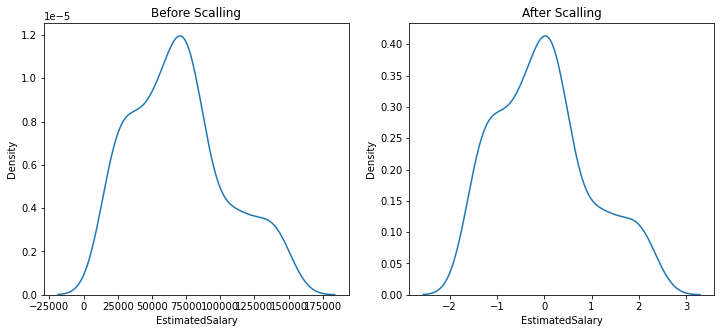

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')

sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After scalling
ax2.set_title('After Scalling')

sns.kdeplot(x_trained_scaler['EstimatedSalary'],ax=ax2)
plt.show()

# Using Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
Lr=LogisticRegression()
Lr_scaled=LogisticRegression()

In [19]:
Lr.fit(x_train,y_train)
Lr_scaled.fit(x_trained_scaler,y_train)

LogisticRegression()

In [20]:
y_pred=Lr.predict(x_test)
y_pred_scaled=Lr_scaled.predict(x_test_scaler)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print('Actual : ',accuracy_score(y_test,y_pred))
print('Scalled : ',accuracy_score(y_test,y_pred_scaled))

Actual :  0.6583333333333333
Scalled :  0.8666666666666667


# Scaling create no difference in some algorithms

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
Dt=DecisionTreeClassifier()
Dt_scaled=DecisionTreeClassifier()

In [27]:
Dt.fit(x_train,y_train)
Dt_scaled.fit(x_trained_scaler,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=Dt.predict(x_test)
y_pred_scaled=Dt_scaled.predict(x_test_scaler)

In [29]:
print('Actual : ',accuracy_score(y_test,y_pred))
print('Scalled : ',accuracy_score(y_test,y_pred_scaled))

Actual :  0.875
Scalled :  0.8666666666666667


### Thank you 
## Author

<a href="https://www.linkedin.com/in/muhammad-zaman-ali-a22946208/" target="_blank">Muhammad Zaman Ali</a>

<hr>

## <h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">Mt Learners</a> 2022. All rights reserved. <h3/>
